In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    
    return np.array(inputs), np.array(labels).reshape(n, 1)

In [3]:
def generate_XOR_easy():
    inputs = []
    labels = []
    
    for i in range(11):
        inputs.append([0.1 * i, 0.1 * i])
        labels.append(0)
        
        if 0.1 * i == 0.5:
            continue
            
        inputs.append([0.1 * i, 1 - 0.1*i])
        labels.append(1)

    return np.array(inputs), np.array(labels).reshape(21, 1)

In [4]:
def plot_data(X, y, pred_y):
    print("Acc: ", 1 - np.mean(abs(y - pred_y)))
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 10))
    color_real = ['red' if l == 0 else 'green' for l in y]
    color_pred = ['red' if l == 0 else 'green' for l in pred_y]
    
    ax[0].scatter(X[:, 0], X[:, 1], color=color_real)
    ax[0].set_aspect("equal")
    ax[0].title.set_text("real")

    ax[1].scatter(X[:, 0], X[:, 1], color=color_pred)
    ax[1].title.set_text("predict")
    ax[1].set_aspect("equal")
    plt.show()

In [5]:
class Model():
    # input is 3d(x, y coordinate + 1 for bias), output is 1d
    # 2 hidden layer, 2 neurons for each

    def __init__(self, lr):
        self.lr = lr
        self.W_0 = np.random.random((3, 2))
        self.W_1 = np.random.random((2, 1))
        pass
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def derivative_sigmoid(self, x):
        return np.multiply(x, 1.0 - x)
    
    def cal_loss(self, y, pred_y):
        # using cross entropy
        return -(y * np.log(pred_y) + (1 - y) * np.log(1 - pred_y))
    
    def derivative_loss(self, y, pred_y):
        return (-y / pred_y) + (1 - y) / (1 - pred_y)
    
    def update_W(self, y, pred_y, z1, x):
        # first update W_1, then W_0
#         dJdy = self.derivative_loss(y, pred_y)  # 1*1
#         dydw1z1 = self.derivative_sigmoid(pred_y)  # 1*1
#         dw1z1dw1 = z1.T  # 2*1
#         delta_W1 = dJdy * dydw1z1 * dw1z1dw1
        
#         dw1z1dz1 = self.W_1
#         dEdz1 = dJdy * dydw1z1 * dw1z1dz1  # 2*1
#         dz1dw0x = self.derivative_sigmoid(z1)  # 2*1
#         dw0xdx = x.T   # 1*3
#         delta_W0 = dEdz1 * dz1dw0x * dw0xdx
        
#         self.W_1 -= lr * delta_W1.T  # 2*1
#         self.W_0 -= lr * delta_W0.T  # 3*2
        
        error = self.derivative_loss(y, pred_y)  # 1*1
        delta_output = error * self.derivative_sigmoid(pred_y)  # 1*1
        dw1z1dw1 = z1.T  # 2*1
        deriv_W1 = delta_output * dw1z1dw1
        
        dw1z1dz1 = self.W_1
        error = delta_output * dw1z1dz1  # 2*1
        delta_hidden = error * self.derivative_sigmoid(z1)  # 2*1
        dw0xdx = x.T   # 1*3
        deriv_W0 = delta_hidden * dw0xdx
        
        self.W_1 -= lr * deriv_W1.T  # 2*1
        self.W_0 -= lr * deriv_W0.T  # 3*2
    
    
    def preprocess_x(self, X_train):
        # add bias term
        X_train = np.hstack((X_train, np.ones(X_train.shape[0]).reshape(-1, 1)))
        return X_train
    
    def train(self, X_train, y_train, iteration=100):
        X_train = self.preprocess_x(X_train)
        
        for i in range(iteration):
            pred_y = []
            for x, y in zip(X_train, y_train):
                x = x.reshape(-1, 1)
                z1 = self.sigmoid(self.W_0.T.dot(x))  # (2*3)(3*1) = 2*1
                y_hat = self.sigmoid(self.W_1.T.dot(z1))  # (1*2)(2*1) = 1*1
                loss = self.cal_loss(y, y_hat)
                self.update_W(y, y_hat, z1, x)
                pred_y.extend(y_hat)
            
            if i % 100 == 0:
                pred_y = np.array(pred_y)
                print("cross entropy: ", np.mean(self.cal_loss(y, pred_y)))
        
        return np.round(np.array(pred_y))

In [252]:
class Model():
    # input is 3d(x, y coordinate + 1 for bias), output is 1d
    # 2 hidden layer, 2 neurons for each
    class Layer():
        def __init__(self, size):
            self.error = -1
            self.delta = -1
            self.W = np.random.random(size)
            self.out_data = -1
                        
    def __init__(self):
        self.layer = []
    
    def add_layer(self, size):
        l = self.Layer(size)
        self.layer.append(l)
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def derivative_sigmoid(self, x):
        return np.multiply(x, 1.0 - x)
    
    def cal_loss(self, y, pred_y):
        # using cross entropy
        return -(y * np.log(pred_y) + (1 - y) * np.log(1 - pred_y))
    
    def derivative_loss(self, y, pred_y):
        return (-y / pred_y) + (1 - y) / (1 - pred_y)
    
    def update_W(self, x, y, pred_y, lr):
        # first update W_1, then W_0
        for i in range(len(self.layer))[::-1]:
            if i == len(self.layer) - 1:
                self.layer[i].error = self.derivative_loss(y, pred_y)
            else:
                self.layer[i].error = self.layer[i+1].delta * self.layer[i+1].W
                
            self.layer[i].delta = self.layer[i].error * self.derivative_sigmoid(self.layer[i].out_data)
            if i == 0:
                self.layer[i].W += lr * (self.layer[i].delta * x.T)
            else:
                self.layer[i].W += lr * (self.layer[i].delta * self.layer[i-1].out_data.T)
                
#         error = self.derivative_loss(y, pred_y)  # 1*1
#         delta_output = error * self.derivative_sigmoid(pred_y)  # 1*1
#         dw1z1dw1 = z1.T  # 2*1
#         deriv_W1 = delta_output * dw1z1dw1
        
#         dw1z1dz1 = self.W_1
#         error = delta_output * dw1z1dz1  # 2*1
#         delta_hidden = error * self.derivative_sigmoid(z1)  # 2*1
#         dw0xdx = x.T   # 1*3
#         deriv_W0 = delta_hidden * dw0xdx
        
#         self.W_1 -= lr * deriv_W1.T  # 2*1
#         self.W_0 -= lr * deriv_W0.T  # 3*2
    
    
    def preprocess_x(self, X_train):
        # add bias term
        X_train = np.hstack((X_train, np.ones(X_train.shape[0]).reshape(-1, 1)))
        return X_train
        
    def train(self, X_train, y_train, lr, iteration=100):
        X_train = self.preprocess_x(X_train)
        
        for i in range(iteration):
            pred_y = []
            for x, y in zip(X_train, y_train):
#                 x = np.atleast_2d(x).T
                x = x.reshape(-1, 1)
                WTx = self.layer[0].W.T.dot(x)
                self.layer[0].out_data = self.sigmoid(WTx)
                for j in range(1, len(self.layer)):
                    WTx = self.layer[j].W.T.dot(WTx)
                    self.layer[j].out_data = self.sigmoid(WTx)
                        
                last_layer = self.layer[len(self.layer) - 1]
                y_hat = last_layer.out_data
                loss = self.cal_loss(y, y_hat)
                self.update_W(x, y, y_hat, lr)
                pred_y.extend(y_hat)
            
            if i % 1 == 0:
                pred_y = np.array(pred_y)
                print("cross entropy: ", np.mean(self.cal_loss(y, pred_y)))
        
        return np.round(np.array(pred_y))

In [253]:
lr = 0.9
X, y = generate_linear()
m = Model()
m.add_layer((3, 2))
m.add_layer((2, 2))
m.add_layer((2, 1))
pred_y = m.train(X, y, lr, iteration=100)
plot_data(X, y, pred_y)

ValueError: non-broadcastable output operand with shape (2,1) doesn't match the broadcast shape (2,2)

cross entropy:  0.712130187216079
Acc:  0.7142857142857143


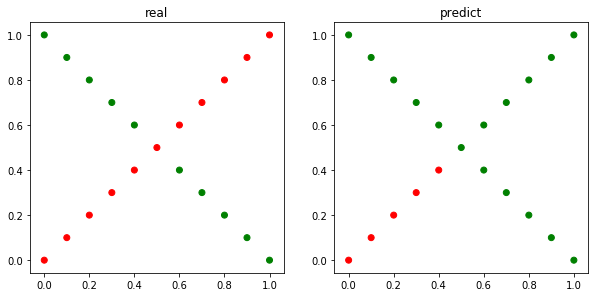

In [325]:
lr = 0.8
X, y = generate_XOR_easy()
m = Model(lr)
pred_y = m.train(X, y, iteration=100)
plot_data(X, y, pred_y)

In [245]:
for i in range(1, 3):
    print(i)

1
2
